# Amazon Stock Analysis

TODO - Write some introduction about your project here: describe the dataset, where you got it from, what you're trying to do with it, and which tools & techniques you're using. You can also mention about the course [Data Analysis with Python: Zero to Pandas](zerotopandas.com), and what you've learned from it.

### How to run the code

This is an executable [*Jupyter notebook*](https://jupyter.org) hosted on [Jovian.ml](https://www.jovian.ml), a platform for sharing data science projects. You can run and experiment with the code in a couple of ways: *using free online resources* (recommended) or *on your own computer*.

#### Option 1: Running using free online resources (1-click, recommended)

The easiest way to start executing this notebook is to click the "Run" button at the top of this page, and select "Run on Binder". This will run the notebook on [mybinder.org](https://mybinder.org), a free online service for running Jupyter notebooks. You can also select "Run on Colab" or "Run on Kaggle".


#### Option 2: Running on your computer locally

1. Install Conda by [following these instructions](https://conda.io/projects/conda/en/latest/user-guide/install/index.html). Add Conda binaries to your system `PATH`, so you can use the `conda` command on your terminal.

2. Create a Conda environment and install the required libraries by running these commands on the terminal:

```
conda create -n zerotopandas -y python=3.8 
conda activate zerotopandas
pip install jovian jupyter numpy pandas matplotlib seaborn opendatasets --upgrade
```

3. Press the "Clone" button above to copy the command for downloading the notebook, and run it on the terminal. This will create a new directory and download the notebook. The command will look something like this:

```
jovian clone notebook-owner/notebook-id
```



4. Enter the newly created directory using `cd directory-name` and start the Jupyter notebook.

```
jupyter notebook
```

You can now access Jupyter's web interface by clicking the link that shows up on the terminal or by visiting http://localhost:8888 on your browser. Click on the notebook file (it has a `.ipynb` extension) to open it.


## Downloading the Dataset

**TODO** 
>- Find the data set on https://www.kaggle.com/datasets?fileType=csv
>- Search the dataset : amazon-stock-price-1997-to-2020
>- Download the dataset using the [`opendatasets` Python library](https://github.com/JovianML/opendatasets#opendatasets)

#### Dataset Description 
The dataset is available on kaggle, the file used in this project is csv file containing the data of *Amazon Stock prices from 1997 to 2020*.

#### About the Data
    Date - in format: yy-mm-dd
    Open - the price of the stock at market open
    High - Highest price reached in the day
    Low - Lowest price reached in the day
    Close - The stock closing at the end of the Market hours
    Adj Close - Is the closing price after adjustments for all applicable splits and dividend distributions
    Volume - Number of shares traded

In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
dataset_url = 'https://www.kaggle.com/salmanfaroz/amazon-stock-price-1997-to-2020' 

In [3]:
import opendatasets as od
od.download(dataset_url)

0it [00:00, ?it/s]

Kaggle dataset ID:  salmanfaroz/amazon-stock-price-1997-to-2020


122880it [00:00, 261064.07it/s]           

Extracting archive ./amazon-stock-price-1997-to-2020.zip to ./amazon-stock-price-1997-to-2020


The dataset has been downloaded and extracted.

In [1]:
data_dir = './amazon-stock-price-1997-to-2020'

In [5]:
import os
os.listdir(data_dir)

['Amazon.csv']

Let us save and upload our work to Jovian before continuing.

In [2]:
project_name = "amazon-stock-analysis-1997-2020"

In [3]:
!pip install jovian --upgrade -q

In [4]:
import jovian

In [5]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Please enter your API key ( from https://jovian.ml/ ):
API KEY: ········
[jovian] Updating notebook "siddharth-patel/amazon-stock-analysis-1997-2020" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/siddharth-patel/amazon-stock-analysis-1997-2020


'https://jovian.ml/siddharth-patel/amazon-stock-analysis-1997-2020'

## Data Preparation and Cleaning

We have done basic data cleaning and and data prepration that would help us to visualise, get a better idea of the data and also help us analysing better



In [1]:
import pandas as pd
amazon_stock_df =pd.read_csv('Amazon.csv')
amazon_stock_df 

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200
...,...,...,...,...,...,...,...
5837,2020-07-27,3062.000000,3098.000000,3015.770020,3055.209961,3055.209961,4170500
5838,2020-07-28,3054.270020,3077.090088,2995.760010,3000.330078,3000.330078,3126700
5839,2020-07-29,3030.989990,3039.159912,2996.770020,3033.530029,3033.530029,2974100
5840,2020-07-30,3014.000000,3092.000000,3005.000000,3051.879883,3051.879883,6128300


In [2]:
amazon_stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5842 non-null   object 
 1   Open       5842 non-null   float64
 2   High       5842 non-null   float64
 3   Low        5842 non-null   float64
 4   Close      5842 non-null   float64
 5   Adj Close  5842 non-null   float64
 6   Volume     5842 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 319.6+ KB


In [3]:
amazon_stock_df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

This means there are no missing values

In [4]:
amazon_stock_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5842.000000,5842.000000,5842.000000,5842.000000,5842.000000,5.842000e+03
mean,372.707174,376.921392,368.114569,372.746660,372.746660,7.519048e+06
std,585.571802,591.766458,578.660700,585.607655,585.607655,7.282683e+06
min,1.406250,1.447917,1.312500,1.395833,1.395833,4.872000e+05
25%,37.955001,38.547501,37.207500,37.927499,37.927499,3.684900e+06
50%,83.428749,84.945000,81.656250,83.459999,83.459999,5.657200e+06
75%,359.729988,363.439987,356.280006,360.047501,360.047501,8.533400e+06
max,3251.060059,3344.290039,3151.000000,3200.000000,3200.000000,1.043292e+08


This gives a generic idea of the dataset.
We can see that the values of minimum and maximum of all columns have a lot of difference, so the total mean is not really meaning full 

In [5]:
amazon_stock_df['Date']= pd.to_datetime(amazon_stock_df['Date'])
amazon_stock_df['Date']

0      1997-05-15
1      1997-05-16
2      1997-05-19
3      1997-05-20
4      1997-05-21
          ...    
5837   2020-07-27
5838   2020-07-28
5839   2020-07-29
5840   2020-07-30
5841   2020-07-31
Name: Date, Length: 5842, dtype: datetime64[ns]

In [6]:
amazon_stock_df['Year']= pd.DatetimeIndex(amazon_stock_df.Date).year
amazon_stock_df['Month']= pd.DatetimeIndex(amazon_stock_df.Date).month
amazon_stock_df['Weekday']= pd.DatetimeIndex(amazon_stock_df.Date).weekday

In [7]:
amazon_stock_df['open_close_diff']=amazon_stock_df['Open'] - amazon_stock_df['Close']
#amazon_stock_df.groupby('Month').mean()
amazon_stock_df['open_close_diff'].describe()

count    5842.000000
mean       -0.039487
std        11.480890
min      -196.640137
25%        -1.360001
50%        -0.009998
75%         1.250000
max       147.060059
Name: open_close_diff, dtype: float64

In [8]:
amazon_stock_yearly_df=amazon_stock_df.groupby('Year').mean()
amazon_stock_monthly_df=amazon_stock_df.groupby('Month').mean()

In [9]:
amazon_stock_df.set_index('Date', inplace=True)

In [10]:
amazon_stock_df['Extreme_diff'] = amazon_stock_df['High'] - amazon_stock_df['Low']

In [15]:
import jovian

In [16]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "siddharth-patel/amazon-stock-analysis-1997-2020" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/siddharth-patel/amazon-stock-analysis-1997-2020


'https://jovian.ml/siddharth-patel/amazon-stock-analysis-1997-2020'

## Exploratory Analysis and Visualization

Here we have done the analysis and visualisation of the data to understand and get more insights on the data set.



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [11]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (18, 7)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### The graph below gives an insight about how the opening stock price of Amazon Inc. has increased over the years from 1997 to 2020

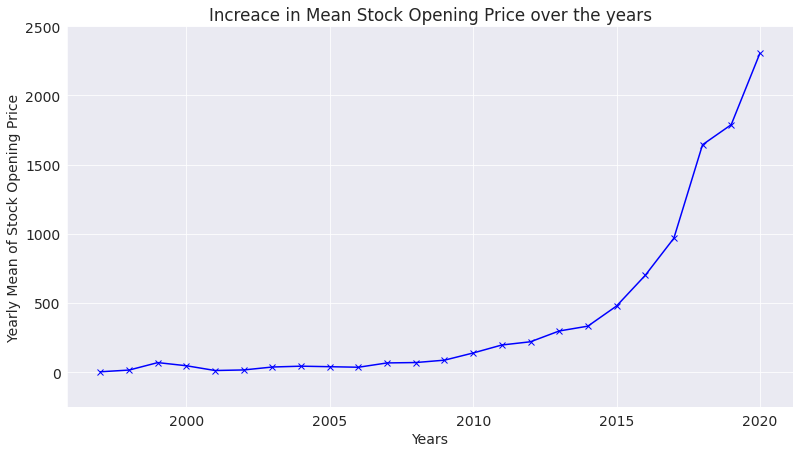

In [28]:
plt.plot(amazon_stock_yearly_df.Open, 'x-b')
plt.ylim(-250,2500)
plt.xlabel('Years')
plt.ylabel('Yearly Mean of Stock Opening Price')
plt.title('Increace in Mean Stock Opening Price over the years');

### The graph below gives an idea of volatility of the stock price on daily basis

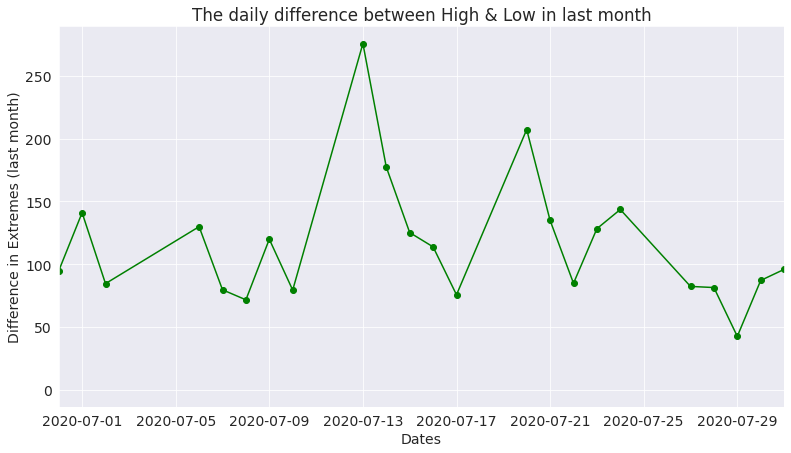

In [29]:
plt.plot(amazon_stock_df['Extreme_diff'],'o-g')
plt.xlim('2020-06-30','2020-07-31')
plt.ylabel('Difference in Extremes (last month)')
plt.xlabel('Dates')
plt.title('The daily difference between High & Low in last month');

### The graph below shows the frequency of distribution of closing price of the stock

<AxesSubplot:xlabel='Close'>

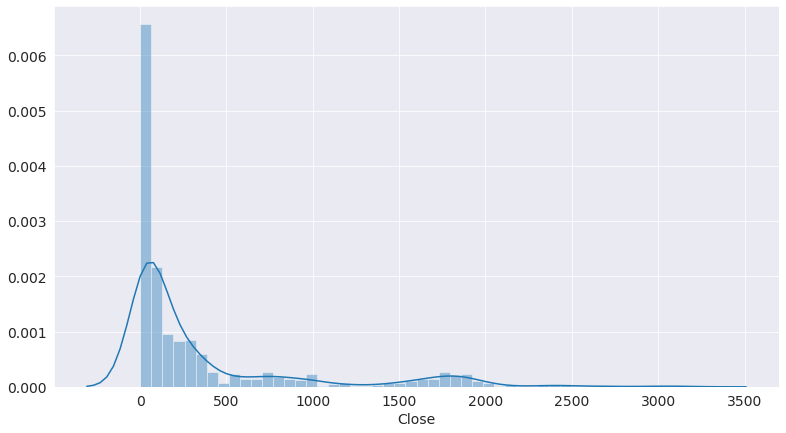

In [31]:
sns.distplot(amazon_stock_df.Close)

### The Graph gives insight about the stock prices in a last month

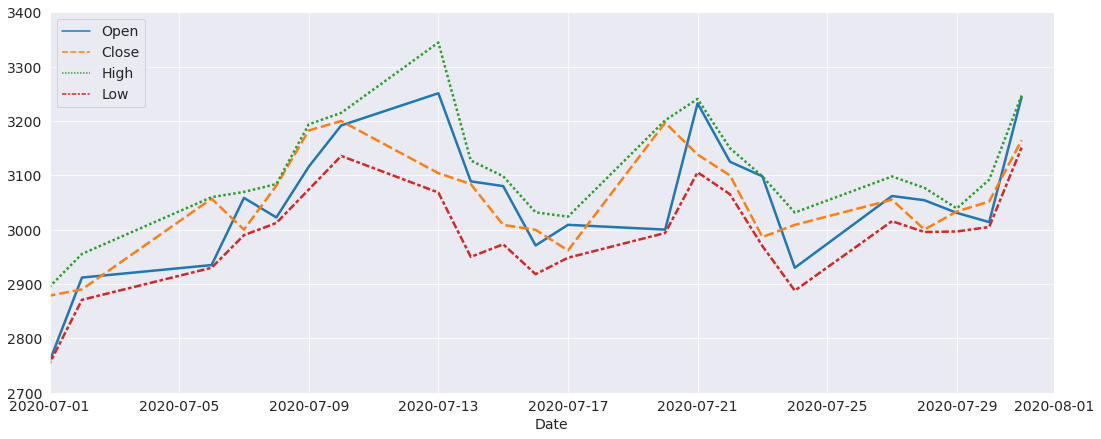

In [16]:
amazon_stock_price_df = amazon_stock_df[['Open','Close','High', 'Low']]
sns.lineplot(data=amazon_stock_price_df, linewidth=2.5)
plt.ylim(2700,3400)
plt.xlim('2020-07-01','2020-08-01');

### The graph can givesan insight about the monthly distribution of volume of stocks traded over the years

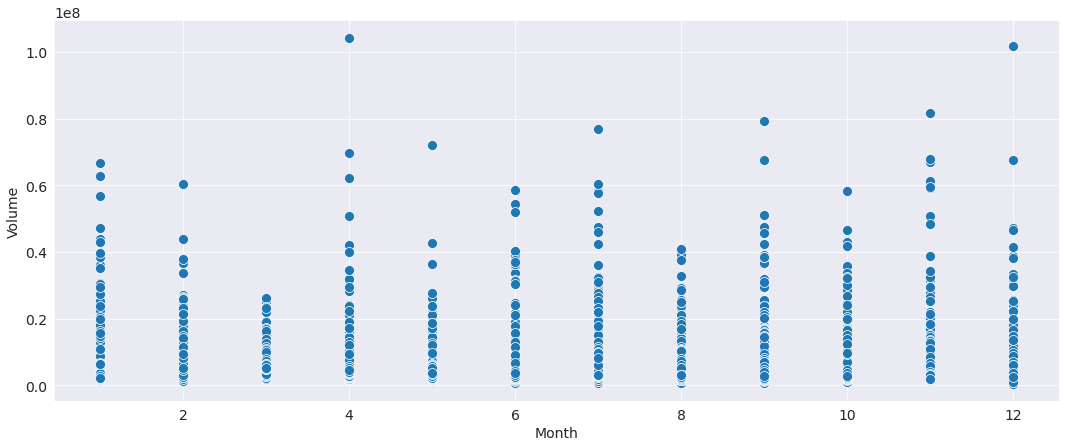

In [169]:
sns.scatterplot(amazon_stock_df.Month, amazon_stock_df.Volume  ,s=100);

Let us save and upload our work to Jovian before continuing

In [170]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..


## Asking and Answering Questions

In this section, we have tried to ask and answer different question about the data to get a more insightful answers we have visualised data for


#### Q1: When were the Amazon stock prices affected by the financial crisis of 2007-2008 

In [41]:
amazon_stock_df_2006 = amazon_stock_df['2006-01-01':'2006-12-31']
amazon_stock_df_2007 = amazon_stock_df['2007-01-01':'2007-12-31']
amazon_stock_df_2008 = amazon_stock_df['2008-01-01':'2008-12-31']
amazon_stock_df_2009 = amazon_stock_df['2009-01-01':'2009-12-31']

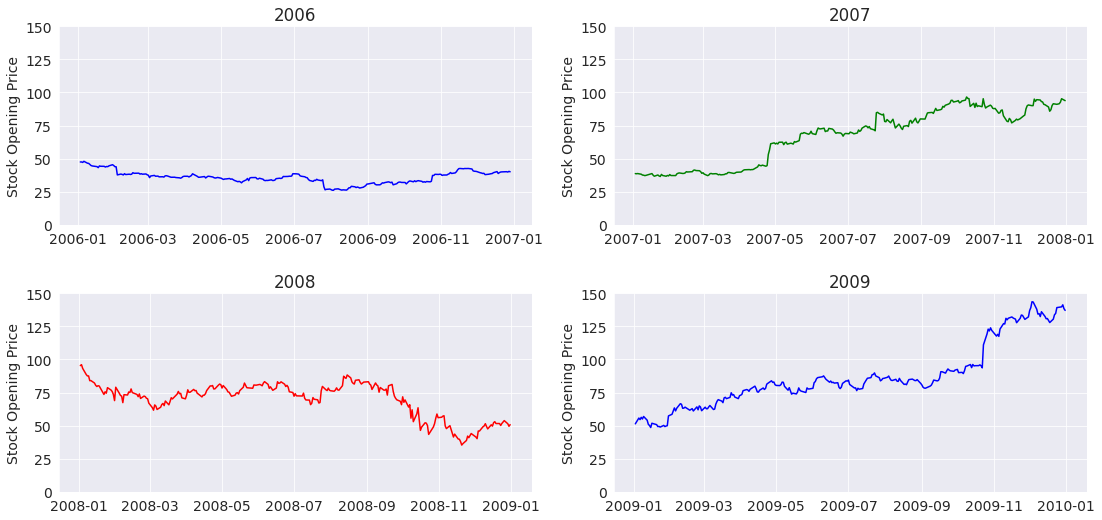

In [42]:
fig, axes = plt.subplots(2, 2, figsize=(16, 8))
fig.tight_layout(pad=3.0);
#2006
axes[0,0].plot(amazon_stock_df_2006.Open,'b')
axes[0,0].set_ylim([0,150])
axes[0,0].set_title('2006')
axes[0,0].set_ylabel('Stock Opening Price');
#2007
axes[0,1].plot(amazon_stock_df_2007.Open, 'g')
axes[0,1].set_ylim([0,150])
axes[0,1].set_title('2007')
axes[0,1].set_ylabel('Stock Opening Price');
#2008
axes[1,0].plot(amazon_stock_df_2008.Open, 'r')
axes[1,0].set_ylim([0,150])
axes[1,0].set_title('2008')
axes[1,0].set_ylabel('Stock Opening Price');
#2009
axes[1,1].plot(amazon_stock_df_2009.Open, 'b')
axes[1,1].set_ylim([0,150])
axes[1,1].set_title('2009')
axes[1,1].set_ylabel('Stock Opening Price');

The Financial crises of 2007-2008 had started around February of 2007. In case of Amazon, as we can see the yearly graphs the stock prices increased through the year 2007 with minor downs, but eventually the prices went down till the end of the year of 2008

#### Q2:  What was the impact of the COVID 19 to the stock prices of Amazon 

In [39]:
amazon_stock_df_corona = amazon_stock_df['2020-03-11':]

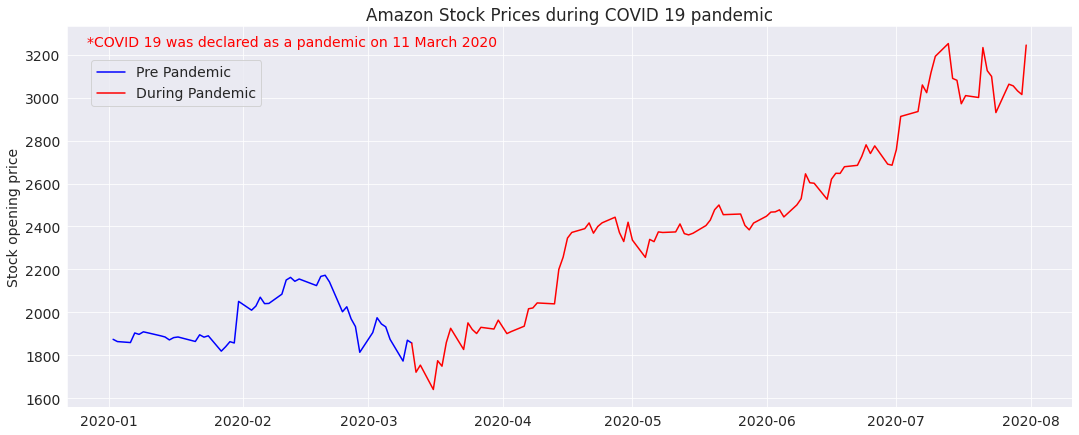

In [43]:
plt.plot(amazon_stock_df['2020-01-01':'2020-03-11'].Open,'b')
plt.plot(amazon_stock_df_corona.Open,'r')
plt.legend(['Pre Pandemic', 'During Pandemic'], bbox_to_anchor=(0.2, 0.93))
plt.figtext(.14, .84, "*COVID 19 was declared as a pandemic on 11 March 2020", c='red')
plt.title('Amazon Stock Prices during COVID 19 pandemic')
plt.ylabel('Stock opening price');

The COVID-19 out break affected a lot of companies in different ways. It mostly broke out worldwide in February and the on 11th March 2020, World Health Organisation (WHO) declared it as a global pandemic.

*Imapact on Amazon*     
As you can see in the graph, when the outbreak started around February the stock prices went started going down after an initial rise. It continued to go down but then around mid March it started coming back up. The price has continued to go up and has reached a peak price. The Amazon stock prices after a inital low, had a good impact as the useage of online shopping increased a lot as the physical shopping became dangerous. 

#### Q3: What is the frequency distribution of the average daily change in price in the last 5 years?

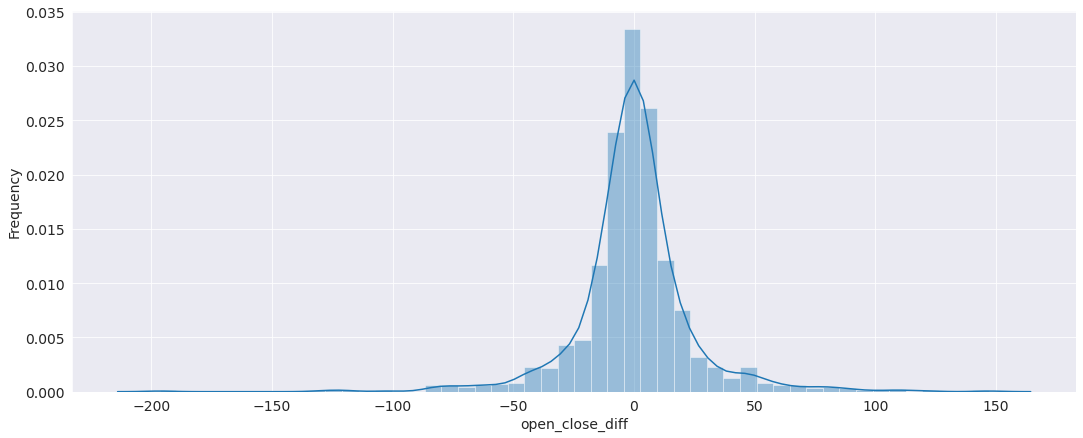

In [37]:
sns.distplot(amazon_stock_df['2015-08-01':].open_close_diff)
plt.ylabel('Frequency');

The distribution of daily difference in stock prices that is the difference in opening and closing prices, over the last 5 years, can be seen in the graph. As we can see majority of the differences are around 0, hence mostly the there is not much difference between the daily opening and closing price. We can also see that the frequency of the difference being positive is more, this tell us that the frequency of rise in price at the closing is less than the frequency of opening price being higher than the closing price.

#### Q4: What is the impact of crises on the volume of Amazon stock being traded?

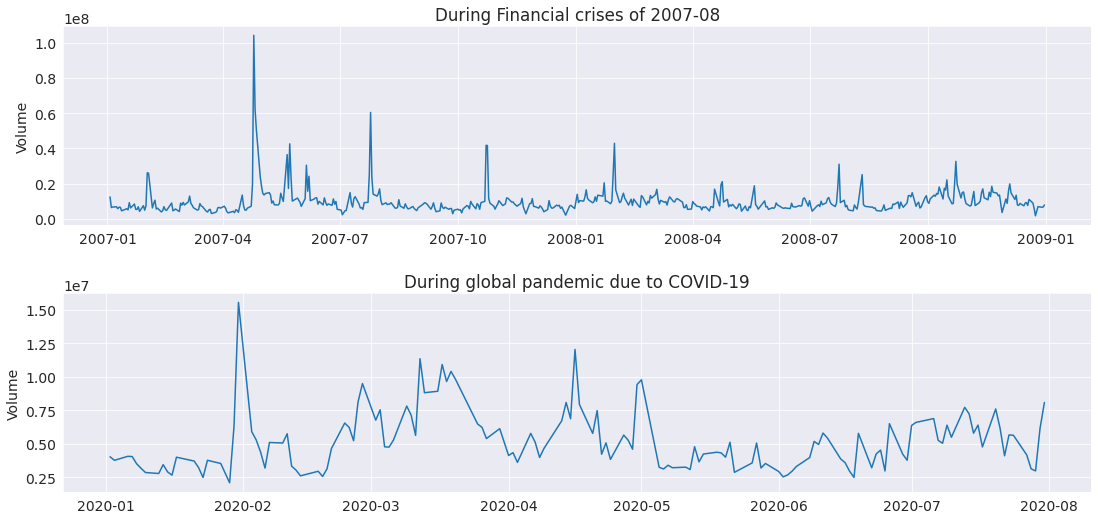

In [36]:
fig, axes = plt.subplots(2, 1, figsize=(16, 8))
fig.tight_layout(pad=3.0)
axes[0].plot(amazon_stock_df['2007-01-01':'2008-12-31'].Volume)
axes[0].set_title('During Financial crises of 2007-08')
axes[0].set_ylabel('Volume');
axes[1].plot(amazon_stock_df['2020-01-01':].Volume)
axes[1].set_title('During global pandemic due to COVID-19')
axes[1].set_ylabel('Volume');

The crises always have an effect on the stock market, as people try to predict the market movements and trade shares according to their predictions and hence the volume of stocks being traded logically gets always undergo a upheaval. This premise can be supported by the graphs above which represent the volume of Amazon stocks being traded during different crises.

In the graph, we can see that there is a hike in price in both the graphs around the time people start realizing that it is a crises. The Financial Crises officailly started in February but it was around March when people saw it as a pattern and started trading the stocks. In the case of Covid-19, the virus started spreading around in January and in February people realised that it is spreading quickly and the forseed a major Crises and started trading the stocks. 

#### Q5: How has the Highs and the lows been in the last few years?

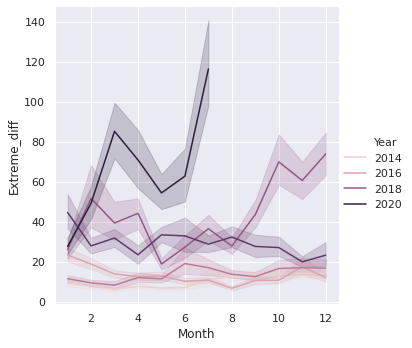

In [68]:
sns.relplot(x="Month", y="Extreme_diff", hue="Year", kind="line", data=amazon_stock_df['2015-01-01':]);

The Extreme Difference means the difference between the daily High and the low of the stock price. As we can see the pattern that the difference has been increasing over the years and that tells us that the company is on its growth period and the stock is quite volatile right now. The higher the difference the more growth of the stock price.

Let us save and upload our work to Jovian before continuing.

In [71]:
import jovian

In [72]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "siddharth-patel/amazon-stock-analysis-1997-2020" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/siddharth-patel/amazon-stock-analysis-1997-2020


'https://jovian.ml/siddharth-patel/amazon-stock-analysis-1997-2020'

## Inferences and Conclusion

Amazon Inc is one of the biggest tech companies in the world and the stocks traded of the company are in millions. The company was started in 1994 and it became public 1997, after had a steady intital growth, the company in recent years has had an accelerated growth. The stock price has increased from 1.4 to 3,200.

The Analysis will give you an idea about how the company has grown over the years, how it is performing recently and how it has performed in financial crises. We have tried to simplify and represented the data through visualization for a more insightful understanding of the company's growth.

The conclusion that can be drawn from the analysis is that it is a company which is growing in a high accelerated pattern. The price have been a little volatile in between during recent time due to the pandemic, but the company ultimately is bound to be a top company and a stock worth investing in.

In [1]:
import jovian

In [2]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Please enter your API key ( from https://jovian.ml/ ):
API KEY: ········
[jovian] Updating notebook "siddharth-patel/amazon-stock-analysis-1997-2020" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/siddharth-patel/amazon-stock-analysis-1997-2020


'https://jovian.ml/siddharth-patel/amazon-stock-analysis-1997-2020'

## References and Future Work

I reffered the following websites for this project:

> - https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas
> - https://in.finance.yahoo.com/quote/AMZN/history
> - https://www.google.com/
> - https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%932008
> - https://stackoverflow.com/
> - https://matplotlib.org/
> - https://seaborn.pydata.org/index.html
> - https://pandas.pydata.org/

In [3]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "siddharth-patel/amazon-stock-analysis-1997-2020" on https://jovian.ml/
